In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

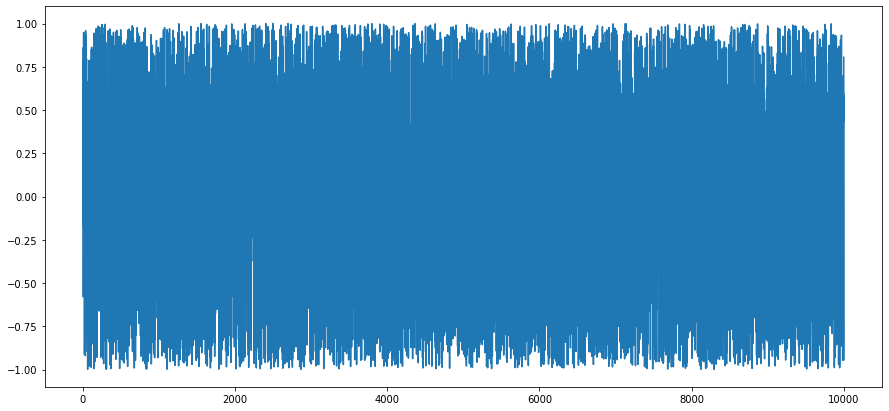

In [2]:
# Generate random data

n_signal = 10000
order = 5001
raw_signal = np.random.uniform(-1, 1, n_signal)

plt.figure(figsize=(15, 7))
plt.plot(raw_signal)


In [3]:
filtering_kernel = signal.firwin(order, .01)

# WILL PRODUCE ERROR, BECAUSE IT REQUIRES RAW SIGNAL TO BE >3x SIZE OF KERNEL (5001x3=15003)
filtered_signal = signal.filtfilt(filtering_kernel, 1, raw_signal)

ValueError: The length of the input vector x must be greater than padlen, which is 15003.

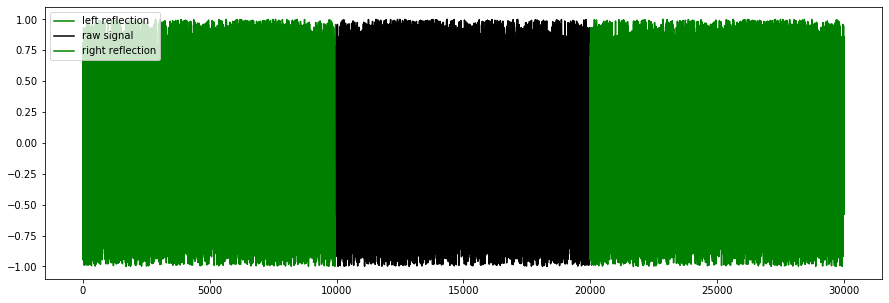

In [4]:
# Dealing with error using reflection
reflection = raw_signal[::-1]
raw_signal_reflected = np.concatenate((reflection, raw_signal, reflection), axis=0)

plt.figure(figsize=(15, 5))
plt.plot(range(0, n_signal), reflection, 'g', label='left reflection')
plt.plot(range(n_signal, n_signal * 2), raw_signal, 'k', label='raw signal')
plt.plot(range(n_signal * 2, n_signal * 3), reflection, 'g', label='right reflection')
plt.legend()


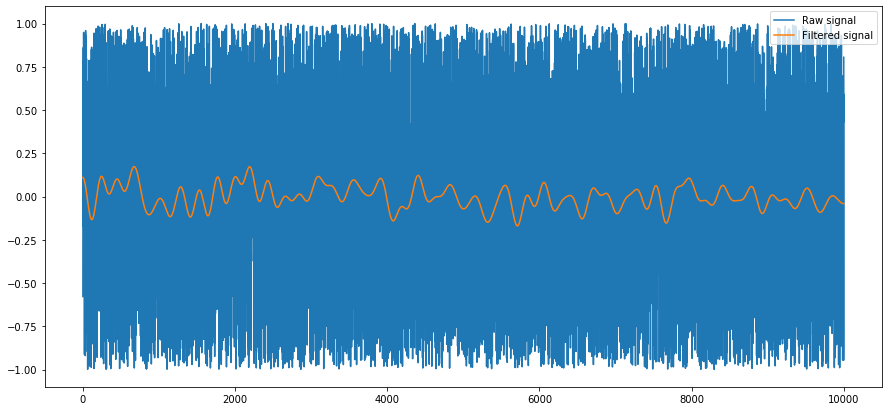

In [6]:
# NO ERROR IS PRODUCED
filtered_signal = signal.filtfilt(filtering_kernel, 1, raw_signal_reflected)

# cut off left and right reflection data
filtered_signal = filtered_signal[n_signal:n_signal * 2]

plt.figure(figsize=(15, 7))
plt.plot(raw_signal, label='Raw signal')
plt.plot(filtered_signal, label='Filtered signal')
plt.legend()